In [ ]:
!pip install kmodes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

import pickle
from pathlib import Path


In [ ]:
import pandas as pd

# import dataset
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")

# menampilkan data
df.head()

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206


In [ ]:
# Cek missing values
print(df.isnull().sum())

Customer_ID            0
Nama Pelanggan         0
Jenis Kelamin          0
Umur                   0
Profesi                0
Tipe Residen           0
NilaiBelanjaSetahun    0
dtype: int64


In [ ]:
# Menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


In [ ]:
df.describe(include='all').transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer_ID,50,50,CUST-001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nama Pelanggan,50,48,Shirley Ratuwati,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jenis Kelamin,50,2,Wanita,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Umur,50.0,NaN,NaN,NaN,37.5,14.673661,14.0,25.0,35.0,49.75,64.0
Profesi,50,5,Wiraswasta,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tipe Residen,50,2,Cluster,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NilaiBelanjaSetahun,50.0,NaN,NaN,NaN,7069874.82,2590618.996988,2722700.0,5257529.75,5980077.0,9739615.0,10884508.0


Kesimpulan \
Setelah melakukan pemanggilan data dan melihat informasi data yang kamu miliki, kamu akhirnya mengetahui bahwa:

- Data yang akan digunakan terdiri dari 50 baris dan 7 kolom
- Tidak ada nilai null pada data
- Dua kolom memiliki tipe data numeric dan lima data bertipe string

**Tips:** \

Dalam setiap project machine learning, kita harus memahami informasi dasar dari data yang kita miliki sebelum melakukan analisa lebih lanjut. Dengan melakukan hal ini, kita bisa memastikan tipe data dari masing-masing kolom sudah benar, mengetahui apakah ada data null di tiap tiap kolom, dan juga mengetahui nama-nama kolom di dataset yang kita gunakan. Informasi ini nantinya akan menentukan proses apa yang perlu kita lakukan selanjutnya.

**Eksplorasi Data Numerik** \
Pertama kamu perlu melihat distribusi data dari data yang berjenis numerik. Disini kamu akan menggunakan `boxplot` dan juga `histogram` untuk melihat distribusi datanya. Untuk membuat grafik tersebut, kamu perlu menyiapkan kolom mana yang merupakan kolom numerik. Kemudian menggunakan library `seaborn` untuk membuat plot masing-masing kolom numerik, yaitu `'Umur'` dan `'NilaiBelanjaSetahun'`.

<Figure size 640x480 with 0 Axes>

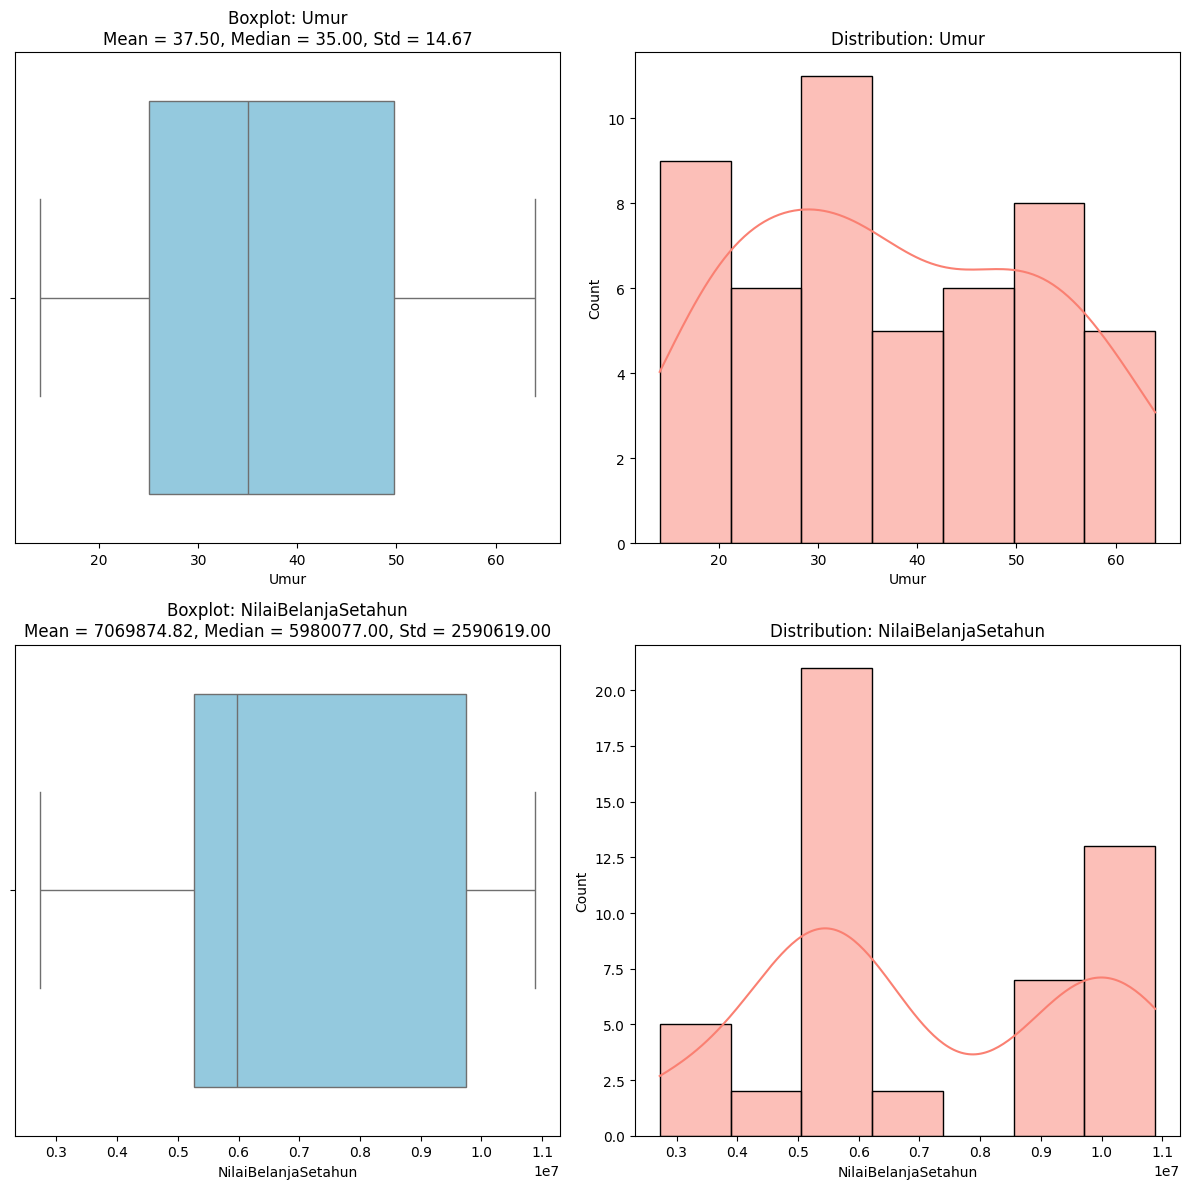

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk eksplorasi data numerik
def eksplorasi_data_numerik(df, fitur):
    plt.clf()
    fig, axs = plt.subplots(nrows=len(fitur), ncols=2, figsize=(12, 6 * len(fitur)))

    for idx, kolom in enumerate(fitur):
        # Boxplot
        sns.boxplot(x=df[kolom], ax=axs[idx, 0], color='skyblue')
        axs[idx, 0].set_title(f'Boxplot: {kolom}\nMean = {df[kolom].mean():.2f}, Median = {df[kolom].median():.2f}, Std = {df[kolom].std():.2f}')

        # Distribution plot
        sns.histplot(df[kolom], kde=True, ax=axs[idx, 1], color='salmon')
        axs[idx, 1].set_title(f'Distribution: {kolom}')

    plt.tight_layout()
    plt.show()

# Kolom numerik yang ingin dieksplorasi
kolom_numerik = ['Umur', 'NilaiBelanjaSetahun']

# Panggil fungsi
eksplorasi_data_numerik(df, kolom_numerik)


**Eksplorasi Data Kategorikal**

<ipython-input-28-23d2843e8b8a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
<ipython-input-28-23d2843e8b8a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
<ipython-input-28-23d2843e8b8a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


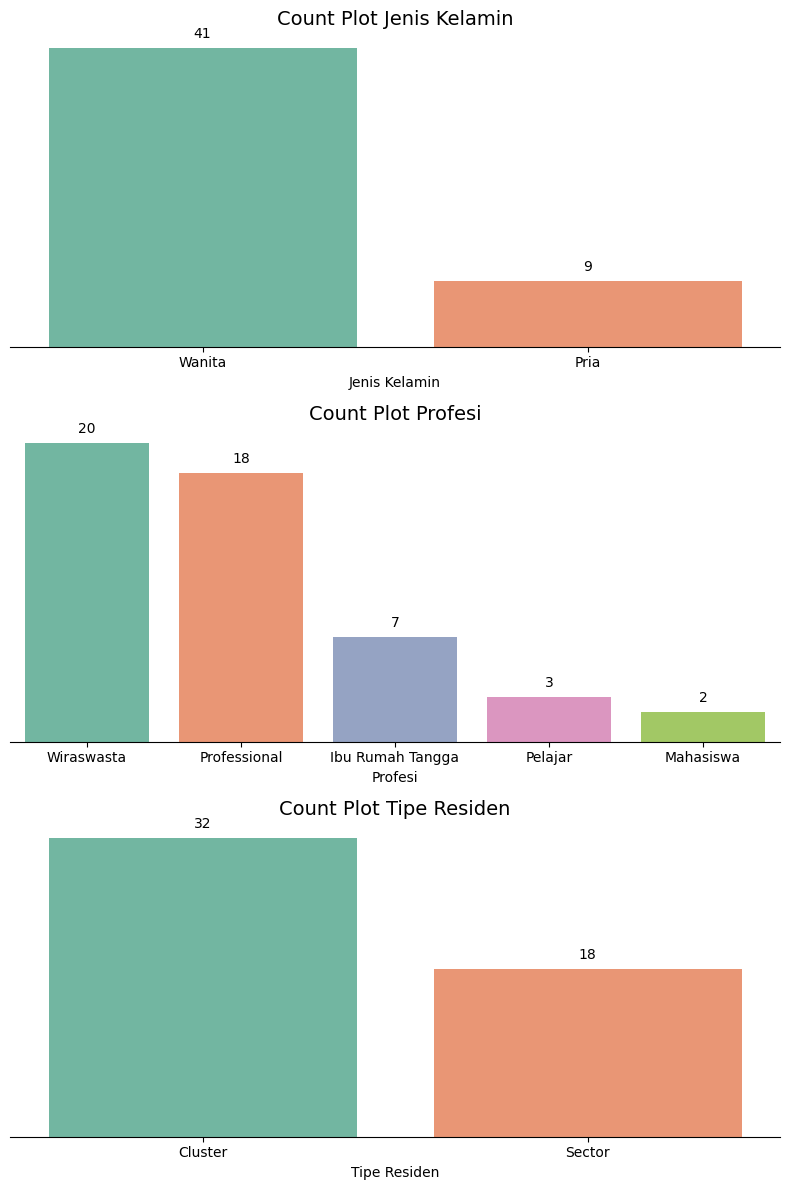

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menyiapkan kolom kategorikal
kolom_kategorikal = ['Jenis Kelamin', 'Profesi', 'Tipe Residen']

# Membuat canvas untuk plot
fig, axs = plt.subplots(nrows=len(kolom_kategorikal), ncols=1, figsize=(8, 12))

# Membuat plot untuk setiap kolom kategorikal
for idx, kolom in enumerate(kolom_kategorikal):
    sns.countplot(
        x=df[kolom],
        order=df[kolom].value_counts().index,
        ax=axs[idx],
        palette='Set2'
    )

    axs[idx].set_title(f'Count Plot {kolom}', fontsize=14)

    # Menambahkan anotasi jumlah
    for patch in axs[idx].patches:
        axs[idx].annotate(
            f'{patch.get_height():.0f}',
            (patch.get_x() + patch.get_width() / 2., patch.get_height()),
            ha='center',
            va='bottom',
            fontsize=10,
            xytext=(0, 5),
            textcoords='offset points'
        )

    # Styling
    sns.despine(ax=axs[idx], top=True, right=True, left=True)
    axs[idx].axes.yaxis.set_visible(False)

# Supaya layout rapi
plt.tight_layout()
plt.show()


**Kesimpulan** \
Dari hasil eksplorasi data tersebut kamu dapat mendapatkan informasi:

- Rata-rata dari umur pelanggan adalah 37.5 tahun
- Rata-rata dari nilai belanja setahun pelanggan adalah 7,069,874.82
- Jenis kelamin pelanggan di dominasi oleh wanita sebanyak 41 orang (82%) dan laki-laki sebanyak 9 orang (18%)
- Profesi terbanyak adalah Wiraswasta (40%) diikuti dengan Professional (36%) dan lainnya sebanyak (24%)
- Dari seluruh pelanggan 64% dari mereka tinggal di Cluster dan 36% nya tinggal di Sektor

<Axes: xlabel='Umur', ylabel='Count'>

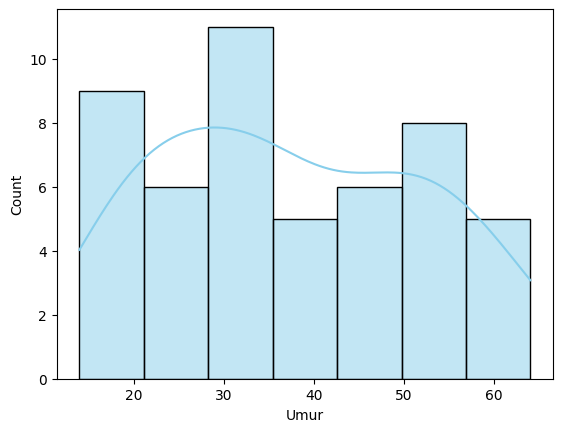

In [ ]:
sns.histplot(df['Umur'], kde=True, color='skyblue')  # Untuk kolom 'Umur'

<Axes: ylabel='NilaiBelanjaSetahun'>

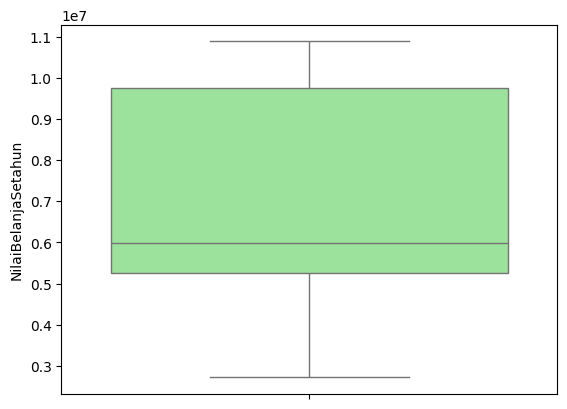

In [ ]:
sns.boxplot(df['NilaiBelanjaSetahun'], color='lightgreen')  # Untuk kolom 'NilaiBelanjaSetahun'


<ipython-input-36-f8f748bf4609>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Profesi'], palette='Set2')  # Untuk kolom 'Profesi'


<Axes: xlabel='Profesi', ylabel='count'>

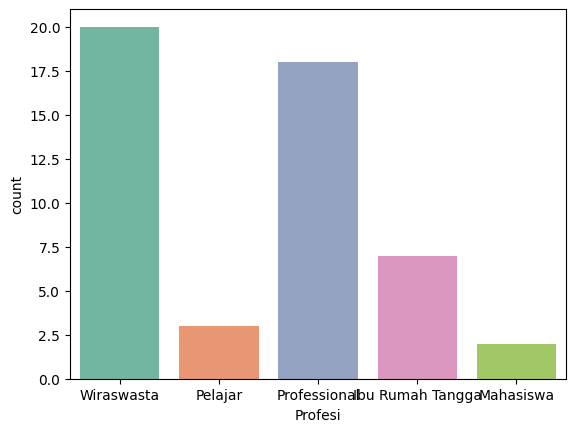

In [ ]:
sns.countplot(x=df['Profesi'], palette='Set2')  # Untuk kolom 'Profesi'

<ipython-input-37-3dc88e658123>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Umur'], shade=True, color='orange')  # Untuk kolom 'Umur'


<Axes: xlabel='Umur', ylabel='Density'>

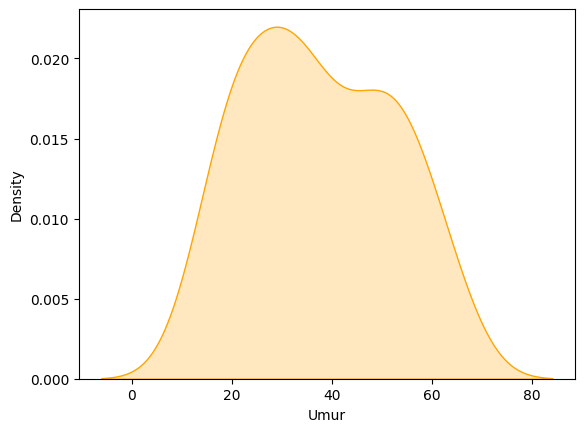

In [ ]:
sns.kdeplot(df['Umur'], shade=True, color='orange')  # Untuk kolom 'Umur'


<Axes: xlabel='Umur', ylabel='NilaiBelanjaSetahun'>

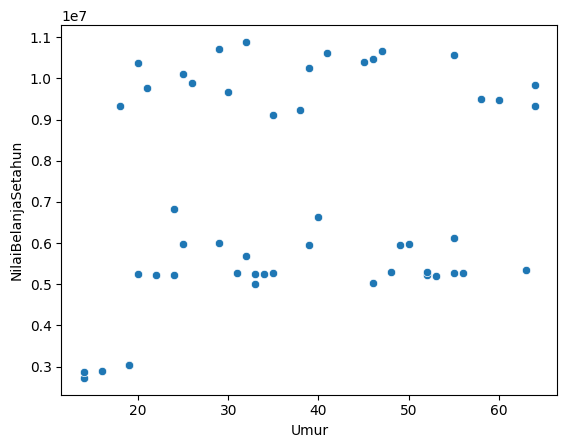

In [ ]:
sns.scatterplot(x=df['Umur'], y=df['NilaiBelanjaSetahun'])  # Hubungan antara Umur dan Nilai Belanja Setahun


In [ ]:
pd.crosstab(df['Jenis Kelamin'], df['Profesi'])


Profesi,Ibu Rumah Tangga,Mahasiswa,Pelajar,Professional,Wiraswasta
Jenis Kelamin,,,,,
Pria,0,0,0,6,3
Wanita,7,2,3,12,17


**Mempersiapkan Data Sebelum Permodelan**

In [ ]:
from sklearn.preprocessing import StandardScaler

kolom_numerik  = ['Umur','NilaiBelanjaSetahun']

# Statistik sebelum Standardisasi
print('Statistik Sebelum Standardisasi\n')
print(df[kolom_numerik ].describe().round(1))

# Standardisasi
df_std = StandardScaler().fit_transform(df[kolom_numerik])

# Membuat DataFrame
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)

# Menampilkan contoh isi data dan summary statistic
print('Contoh hasil standardisasi\n')
print(df_std.head())

print('Statistik hasil standardisasi\n')
print(df_std.describe().round(0))

Statistik Sebelum Standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   37.5            7069874.8
std    14.7            2590619.0
min    14.0            2722700.0
25%    25.0            5257529.8
50%    35.0            5980077.0
75%    49.8            9739615.0
max    64.0           10884508.0
Contoh hasil standardisasi

       Umur  NilaiBelanjaSetahun
0  1.411245             0.946763
1 -1.617768            -1.695081
2  0.722833            -0.695414
3  1.067039            -0.727361
4  0.240944             1.382421
Statistik hasil standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   -0.0                 -0.0
std     1.0                  1.0
min    -2.0                 -2.0
25%    -1.0                 -1.0
50%    -0.0                 -0.0
75%     1.0                  1.0
max     2.0                  1.0


**Konversi Kategorikal Data dengan Label Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisiasi nama kolom kategorikal
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']

# Membuat salinan data frame
df_encode = df[kolom_kategorikal].copy()


# Melakukan labelEncoder untuk semua kolom kategorikal
for col in kolom_kategorikal:
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

# Menampilkan data
print(df_encode.head())

   Jenis Kelamin  Profesi  Tipe Residen
0              0        4             1
1              1        2             0
2              0        3             0
3              0        3             0
4              1        4             0


**save csv siap to modeling**

In [ ]:
df_encode.to_csv('customer_segmentation_readymodeling.csv', sep='\t', index=False)

**Menggabungkan Data untuk Permodelan**

In [ ]:
kolom_numerik  = ['Umur','NilaiBelanjaSetahun']
df_std = StandardScaler().fit_transform(df[kolom_numerik])
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)

kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']
df_encode = df[kolom_kategorikal].copy()
for col in kolom_kategorikal:
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

df_model = df_encode.merge(df_std, left_index = True, right_index=True, how = 'left')
df_model.head()


,Jenis Kelamin,Profesi,Tipe Residen,Umur,NilaiBelanjaSetahun
0,0,4,1,1.411245,0.946763
1,1,2,0,-1.617768,-1.695081
2,0,3,0,0.722833,-0.695414
3,0,3,0,1.067039,-0.727361
4,1,4,0,0.240944,1.382421


**Kesimpulan** \
Sampai di sini, kamu sudah menggunakan kemampuan kamu dalam menyiapkan library dan data. Kemudian melakukan data eksplorasi dan pemrosesan data hingga mendapatkan data yang siap digunakan untuk permodelan.

**Mencari Jumlah Cluster yang Optimal**

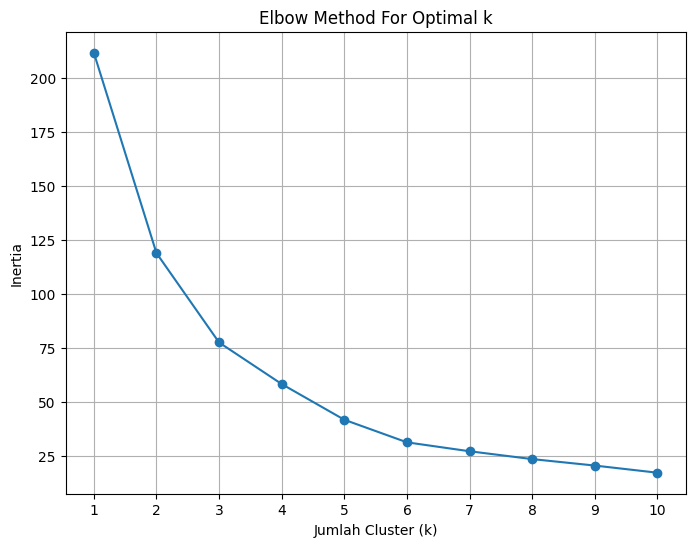

In [ ]:
# Menghitung Inertia untuk berbagai jumlah cluster
inertia = []
for k in range(1, 11):  # Menguji cluster dari 1 hingga 10
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_model)  # Gantilah df_model dengan dataset Anda
    inertia.append(kmeans.inertia_)  # Menyimpan nilai inertia untuk setiap k

# Visualisasikan Elbow Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


**Membuat Model**

In [ ]:
import pandas as pd
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import pickle

# Membuat model KPrototypes
kproto = KPrototypes(n_clusters=3, init='Cao', n_init=10, max_iter=300, random_state=42)

# Melatih model dengan data (contoh df_model)
kproto = kproto.fit(df_model, categorical=[0, 1, 2])  # Asumsikan kolom 0, 1, 2 adalah kategorikal

# Menyimpan model ke file
pickle.dump(kproto, open('cluster.pkl', 'wb'))


**Menggunakan Model**

In [ ]:
kproto = KPrototypes(n_clusters=5, random_state = 75)
kproto = kproto.fit(df_model, categorical=[0,1,2])

# Menentukan segmen tiap pelanggan
clusters =  kproto.predict(df_model, categorical=[0,1,2])
print('segmen pelanggan: {}\n'.format(clusters))

# Menggabungkan data awal dan segmen pelanggan
df_final = df.copy()
df_final['cluster'] = clusters
df_final.head()

segmen pelanggan: [3 1 2 2 0 4 3 2 4 4 2 2 3 3 0 4 4 2 0 1 0 2 4 0 0 2 0 4 2 2 1 3 1 0 4 0 4
 3 4 1 4 0 4 0 4 0 2 3 4 3]



,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,3
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,1
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,2
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,2
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,0


In [ ]:
# Menghitung jumlah pelanggan per cluster
jumlah_per_cluster = df_final['cluster'].value_counts()

print(jumlah_per_cluster)

cluster
4    14
0    12
2    11
3     8
1     5
Name: count, dtype: int64


In [ ]:
# Menampilkan data pelanggan berdasarkan cluster nya
for i in range(0, 5):  # Iterasi untuk setiap cluster (dari cluster 0 hingga 4)
    print('\nPelanggan cluster: {}\n'.format(i))  # Menampilkan label cluster
    print(df_final[df_final['cluster'] == i])  # Menampilkan data pelanggan yang berada pada cluster ke-i



Pelanggan cluster: 0

   Customer_ID       Nama Pelanggan Jenis Kelamin  Umur     Profesi  \
4     CUST-005  Ibu Sri Wahyuni, IR        Wanita    41  Wiraswasta   
14    CUST-015     Shirley Ratuwati        Wanita    20  Wiraswasta   
18    CUST-019         Mega Pranoto        Wanita    32  Wiraswasta   
20    CUST-021     Lestari Fabianto        Wanita    38  Wiraswasta   
23    CUST-024        Putri Ginting        Wanita    39  Wiraswasta   
24    CUST-025       Julia Setiawan        Wanita    29  Wiraswasta   
26    CUST-027        Grace Mulyati        Wanita    35  Wiraswasta   
33    CUST-034       Deasy Arisandi        Wanita    21  Wiraswasta   
35    CUST-036       Ni Made Suasti        Wanita    30  Wiraswasta   
41    CUST-042         Yuliana Wati        Wanita    26  Wiraswasta   
43    CUST-044                 Anna        Wanita    18  Wiraswasta   
45    CUST-046         Elfira Surya        Wanita    25  Wiraswasta   

   Tipe Residen  NilaiBelanjaSetahun  cluster  
4    

**Visualisasi Boxplot**

<ipython-input-73-dd1c6f694b43>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=kol, data=df_final, palette='Set2')
<ipython-input-73-dd1c6f694b43>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=kol, data=df_final, palette='Set2')


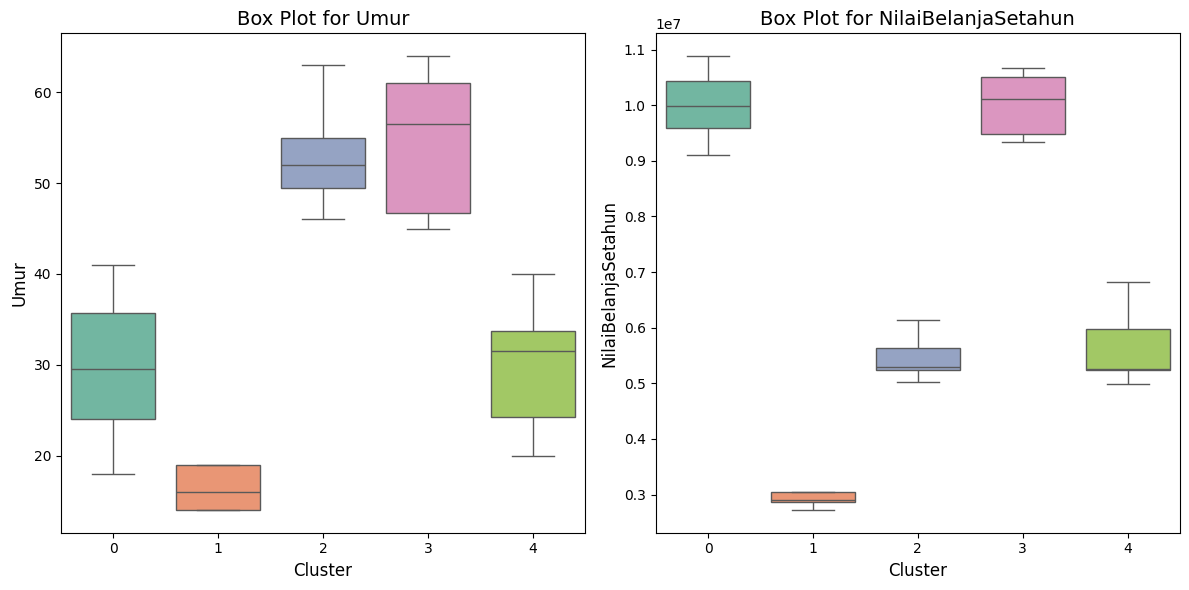

In [ ]:
# Visualisasi Box Plot untuk variabel numerik berdasarkan cluster
kolom_numerik = ['Umur', 'NilaiBelanjaSetahun']  # Kolom yang ingin divisualisasikan

plt.figure(figsize=(12, 6))
for i, kol in enumerate(kolom_numerik):
    plt.subplot(1, len(kolom_numerik), i + 1)  # Membuat sub-plot untuk setiap kolom
    sns.boxplot(x='cluster', y=kol, data=df_final, palette='Set2')
    plt.title(f'Box Plot for {kol}', fontsize=14)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel(kol, fontsize=12)

plt.tight_layout()
plt.show()

**Visualisasi Countplot**

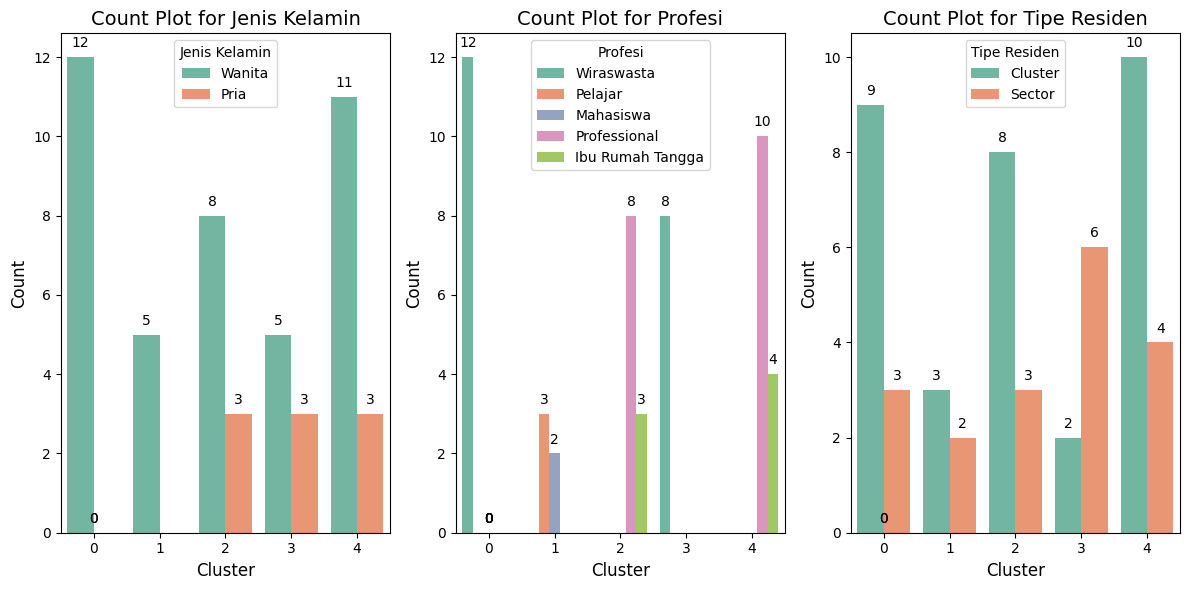

In [ ]:
# Data Kategorikal
kolom_categorikal = ['Jenis Kelamin','Profesi','Tipe Residen']

plt.figure(figsize=(12, 6))
for i, kol in enumerate(kolom_kategorikal):
    plt.subplot(1, len(kolom_kategorikal), i + 1)  # Membuat sub-plot untuk setiap kolom
    ax = sns.countplot(x='cluster', hue=kol, data=df_final, palette='Set2')
    plt.title(f'Count Plot for {kol}', fontsize=14)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Menambahkan angka pada setiap bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10,
                    xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

**Menamakan Cluster**

In [ ]:
# Mapping nama kolom
df_final['segmen'] = df_final['cluster'].map({
    0: 'Diamond Young Member',
    1: 'Diamond Senior Member',
    2: 'Silver Member',
    3: 'Gold Young Member',
    4: 'Gold Senior Member'
})

print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
 7   cluster              50 non-null     uint16
 8   segmen               50 non-null     object
dtypes: int64(2), object(6), uint16(1)
memory usage: 3.4+ KB
None


In [ ]:
df_final.head()

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster,segmen
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,3,Gold Young Member
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,1,Diamond Senior Member
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,2,Silver Member
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,2,Silver Member
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,0,Diamond Young Member


**Kesimpulan** \
Yeay! Akhirnya kamu sudah berhasil melakukan segmentasi pelanggan dan mendapatkan nama yang cocok untuk masing masing cluster, yaitu:

- Cluster 0: Diamond Young Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Selain itu isi dari cluster ini memiliki umur sekitar 18 - 41 tahun dengan rata-ratanya adalah 29 tahun.
- Cluster 1: Diamond Senior Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Isi dari cluster ini memiliki umur sekitar 45 - 64 tahun dengan rata-ratanya adalah 55 tahun.
- Cluster 2: Silver Students, isi cluster ini adalah para pelajar dan mahasiswa dengan rata-rata umur mereka adalah 16 tahun dan nilai belanja setahun mendekati 3 juta.
- Cluster 3: Gold Young Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia muda dengan rentang umur sekitar 20 - 40 tahun dan dengan rata-rata 30 tahun dan nilai belanja setahunnya mendekati 6 juta.
- Cluster 4: Gold Senior Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia tua dengan rentang umur 46 - 63 tahun dan dengan rata-rata 53 tahun dan nilai belanja setahunnya mendekati 6 juta.

**Mempersiapkan Data Baru** \
Disini kamu membuat contoh data baru untuk diprediksi dengan model yang sudah dibuat. Hal ini kamu lakukan dengan membuat satu buah dataframe yang berisi informasi pelanggan.

In [ ]:
import pandas as pd
# Data Baru
data = [{
    'Customer_ID': 'CUST-100' ,
    'Nama Pelanggan': 'Joko' ,
    'Jenis Kelamin': 'Pria',
    'Umur': 45,
    'Profesi': 'Wiraswasta',
    'Tipe Residen': 'Cluster' ,
    'NilaiBelanjaSetahun': 8230000

}]

# Membuat Data Frame
new_df = pd.DataFrame(data)

# Melihat Data
new_df

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-100,Joko,Pria,45,Wiraswasta,Cluster,8230000


**Membuat Fungsi Data Pemrosesan**

In [ ]:
def data_preprocess(data):
    # Konversi Kategorikal data
    kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']

    df_encode = data[kolom_kategorikal].copy()

    ## Jenis Kelamin
    df_encode['Jenis Kelamin'] = df_encode['Jenis Kelamin'].map({
        'Pria': 0,
        'Wanita' : 1
    })

    ## Profesi
    df_encode['Profesi'] = df_encode['Profesi'].map({
        'Ibu Rumah Tangga': 0,
        'Mahasiswa' : 1,
        'Pelajar': 2,
        'Professional': 3,
        'Wiraswasta': 4
    })

    ## Tipe Residen
    df_encode['Tipe Residen'] = df_encode['Tipe Residen'].map({
        'Cluster': 0,
        'Sector' : 1
    })

    # Standardisasi Numerical Data
    kolom_numerik = ['Umur','NilaiBelanjaSetahun']
    df_std = data[kolom_numerik].copy()

    ## Standardisasi Kolom Umur
    df_std['Umur'] = (df_std['Umur'] - 37.5)/14.7

    ## Standardisasi Kolom Nilai Belanja Setahun
    df_std['NilaiBelanjaSetahun'] = (df_std['NilaiBelanjaSetahun'] - 7069874.8)/2590619.0

    # Menggabungkan Kategorikal dan numerikal data
    df_model = df_encode.merge(df_std, left_index = True,
                           right_index=True, how = 'left')

    return df_model

# Menjalankan fungsi
new_df_model = data_preprocess(new_df)

print(new_df_model)


   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             0  0.510204             0.447818


**Memanggil Model dan Melakukan Prediksi**

In [ ]:
def modelling (data):

    # Memanggil Model
    kpoto = pickle.load(open('cluster.pkl', 'rb'))

    # Melakukan Prediksi
    clusters = kpoto.predict(data,categorical=[0,1,2])

    return clusters

# Menjalankan Fungsi
clusters = modelling(new_df_model)

print(clusters)


[0]


In [ ]:
def menamakan_segmen (data_asli, clusters):

    # Menggabungkan cluster dan data asli
    final_df = data_asli.copy()
    final_df['cluster'] = clusters

    # Menamakan segmen
    final_df['segmen'] = final_df['cluster'].map({
        0: 'Diamond Young Member',
        1: 'Diamond Senior Member',
        2: 'Silver Students',
        3: 'Gold Young Member',
        4: 'Gold Senior Member'
    })

    return final_df

# Menjalankan Fungsi
new_final_df = menamakan_segmen(new_df,clusters)

print(new_final_df)

  Customer_ID Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0    CUST-100           Joko          Pria    45  Wiraswasta      Cluster   

   NilaiBelanjaSetahun  cluster                segmen  
0              8230000        0  Diamond Young Member  


In [107]:
pip freeze > requirements.txt
